# Gaming Data with Twitch

Twitch Logo

<a href="https://www.twitch.tv/">Twitch</a> is the world's leading live streaming platform for gamers, with 15 million daily active users. Using data to understand its users and products is one of the main responsibilities of the Twitch <a href="https://science.twitch.tv/">Science Team</a>.

In this project, you will be working with two tables that contain Twitch users’ stream viewing data and chat room usage data.

Stream viewing data:

|Headers|Description|
|:------|:----------|
|`time`|date and time (YYYY-MM-DD HH:MM:SS)|
|`device_id`|device ID|
|`login`|login ID|
|`channel`|streamer name|
|`country`|country name abbreviation|
|`player`|streamed device|
|`game`|game name|
|`stream_format`|stream quality|
|`subscriber`|is the viewer a subscriber? (true/false)|

Chat usage data:

|Headers|Description|
|:------|:----------|
|`time`|date and time (YYYY-MM-DD HH:MM:SS)|
|`device_id`|device ID|
|`login`|login ID|
|`channel`|streamer name|
|`country`|country name abbreviation|
|`player`|chat device|
|`game`|game name|

The Twitch Science Team provided this practice dataset. You can download the .csv files (800,000 rows) from <a href="https://github.com/Codecademy/datasets/tree/master/twitch">GitHub</a>.

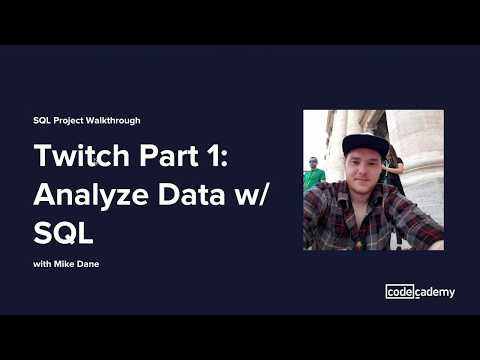

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('MBmLgw2xdqc', width = 800, height = 500)

In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('gaming_data.db')

# stream = pd.read_csv('stream.csv')
# chat = pd.read_csv('chat.csv')

stream = pd.read_sql('''SELECT * FROM stream''', conn)
chat = pd.read_sql('''SELECT * FROM chat''', conn)

1. Start by getting a feel for the `stream` table and the `chat` table.

    Select the first 20 rows from each of the two tables.

    What are the column names?

In [3]:
stream.head(20)

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,None,None
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,0
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,0
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,0
5,2015-01-01 23:27:36,343fe2bfd58595d5c18602d420ecf6f9d694d5a8,7814f661a54349ff5eee84f9d6f476918c9b7270,george,US,iphone_t,DayZ,None,None
6,2015-01-01 21:09:23,80a0c7d1abb6a5a0060e18202b77bef831e08ca5,eb158cab3f606d3894a32e20bddbfd2d589095a9,frank,US,site,League of Legends,high,1
7,2015-01-01 19:14:27,1e342e5e4e228f617449029054b3bb19c5224528,2aaf6a414bc3dc923b04f986de7ba1b8101c6698,frank,CA,site,League of Legends,high,0
8,2015-01-01 13:51:04,272cffbb1a9a33ad3bb48a2ee9ae5cbcac5ca22e,401716920e3435b5e3eec9fc4ccd6a44c7af38f5,kramer,TR,site,Counter-Strike: Global Offensive,chunked,0
9,2015-01-01 22:00:14,593ed161c456eeeb9e18b8005786d42abc1a7373,ef24dc49ceb4bcd3cccb0fa862d8a150ecf935e1,frank,US,site,League of Legends,medium,0


In [4]:
chat.head(20)

,time,device_id,login,channel,country,chat_device,game
0,2015-01-01 18:45:50,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,None,Dota 2
1,2015-01-01 01:16:57,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,None,Devil May Cry 4: Special Edition
2,2015-01-01 16:22:10,d448ba963d7e1023dd1b0a40b95d4f6611750692,77ab14c1fb815e1c369ba0cf7d4c56b4fe489997,frank,GB,iphone_t,League of Legends
3,2015-01-01 03:58:13,8d6823dc52b400b50aebf269bf1f03a36d19eeaa,91cb88c0743761589273fc5e800e7743ece46494,frank,US,iphone_t,League of Legends
4,2015-01-01 11:47:35,16c1e39594d62358d27ae604ad43a071f0d86bc4,51a9234f83d656607cfd7f26690c12d2ffbce353,estelle,DE,None,Dota 2
5,2015-01-01 17:59:51,6fcc75522de37833a0fb21fba4965aad3b63ea57,f628d1cb946ea2e8cffc0b327bc9d77775b8d3c0,jerry,RU,None,Dota 2
6,2015-01-01 02:24:33,dea94b3030025d837dd841fbfd479e775987f65d,9dbbcf6c7792074771c4c7284807041eac467ad5,elaine,TW,None,Gaming Talk Shows
7,2015-01-01 18:26:34,671bee0f3d66077876d9bc231990597292392cc2,51c286a41daa8e060275f622f2b8436bee9fab91,jerry,UA,None,Dota 2
8,2015-01-01 13:13:18,8b31d5ebd1f4f41d4365ae4a471c1686dd256745,06decad1d9565150791e183da017f47123433a4c,estelle,GB,ipad_t,Dota 2
9,2015-01-01 20:20:55,f2ebb129e6930e608f2ed3f5fb52bc4d533c4891,4679f8113aa157ba76fc6db5878d7ee625e88d55,frank,CA,None,League of Legends


In [5]:
stream_columns = list(stream)
for column in stream_columns:
    print(column)

time
device_id
login
channel
country
player
game
stream_format
subscriber


In [6]:
chat_columns = list(chat)
for column in chat_columns:
    print(column)

time
device_id
login
channel
country
chat_device
game


2. What are the unique `games` in the `stream` table?

In [7]:
unique_games = list(stream.game.unique())
for game in unique_games:
    print(game)

League of Legends
DayZ
Dota 2
Heroes of the Storm
Counter-Strike: Global Offensive
Hearthstone: Heroes of Warcraft
The Binding of Isaac: Rebirth
Agar.io
Gaming Talk Shows
None
Rocket League
World of Tanks
ARK: Survival Evolved
SpeedRunners
Breaking Point
Duck Game
Devil May Cry 4: Special Edition
Block N Load
Fallout 3
Batman: Arkham Knight
Reign Of Kings
The Witcher 3: Wild Hunt
The Elder Scrolls V: Skyrim
Super Mario Bros.
H1Z1
The Last of Us
Depth
Mortal Kombat X
Senran Kagura: Estival Versus
The Sims 4
You Must Build A Boat
Choice Chamber
Music
Risk of Rain
Grand Theft Auto V
Besiege
Super Mario Bros. 3
Hektor
Bridge Constructor Medieval
Lucius
Blackjack
Cities: Skylines


3. What are the unique `channel`s in the `stream` table?

In [8]:
unique_channels = list(stream.channel.unique())
for channel in unique_channels:
    print(channel)

frank
george
estelle
morty
kramer
jerry
helen
newman
elaine
susan


## Aggregate Functions:

4. What are the most popular `game`s in the `stream` table?

    Create a list of games and their number of viewers using `groupby`.

In [9]:
popular_games = stream\
                .groupby('game')\
                .login.count()\
                .reset_index()\
                .rename(columns={'login': 'counts'})\
                .sort_values(by='counts', ascending=False)
                
popular_games

,game,counts
23,League of Legends,193533
14,Dota 2,85608
10,Counter-Strike: Global Offensive,54438
11,DayZ,38004
22,Heroes of the Storm,35310
34,The Binding of Isaac: Rebirth,29467
17,Gaming Talk Shows,28115
39,World of Tanks,15932
20,Hearthstone: Heroes of Warcraft,14399
1,Agar.io,11480


5. These are some big numbers from the game League of Legends (also known as LoL).

    Where are these LoL stream viewers located?

    Create a list of countries and their number of LoL viewers.

In [10]:
lol_country_distribution = stream[stream.game == 'League of Legends']\
                            .groupby('country')\
                            .login.count()\
                            .reset_index()\
                            .rename(columns={'login': 'counts'})\
                            .sort_values(by='counts', ascending=False)

lol_country_distribution

,country,counts
147,US,85606
27,CA,13034
36,DE,10835
51,GB,6964
143,TR,4412
...,...,...
1,AD,1
137,SN,1
136,SM,1
61,GY,1


6. The `player` column contains the source the user is using to view the stream (`site`, `iphone`, `android`, etc).

    Create a list of `player`s and their number of streamers.

In [11]:
popular_players = stream\
                .groupby('player')\
                .login.count()\
                .reset_index()\
                .rename(columns={'login': 'counts'})\
                .sort_values(by='counts', ascending=False)
                
popular_players

,player,counts
13,site,246115
9,iphone_t,100689
1,android,93508
8,ipad_t,53646
4,embed,19819
15,xbox_one,4863
7,home,3479
6,frontpage,1567
0,amazon,1155
14,xbox360,985


7. Create a new column named `genre` for each of the games.

    Group the games into their genres: Multiplayer Online Battle Arena (MOBA), First Person Shooter (FPS), Survival, and Other.

    Using CASE, your logic should be:

    * If League of Legends → MOBA
    * If Dota 2 → MOBA
    * If Heroes of the Storm → MOBA
    * If Counter-Strike: Global Offensive → FPS
    * If DayZ → Survival
    * If ARK: Survival Evolved → Survival
    * Else → Other

    Use GROUP BY and ORDER BY to showcase only the unique game titles.

In [12]:
def classify_genre(game_name):
    if game_name in ['League of Legends', 'Dota 2', 'Heroes of the Storm']:
        return 'MOBA'
    if game_name == 'Counter-Strike: Global Offensive':
        return 'FPS'
    if game_name in ['DayZ', 'ARK: Survival Evolved']:
        return 'Survival'
    else:
        return 'Other'

stream['genre'] = stream.apply(lambda row: (classify_genre(row['game'])), axis=1)
stream

,time,device_id,login,channel,country,player,game,stream_format,subscriber,genre
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,None,None,MOBA
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0,Survival
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,0,MOBA
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,0,MOBA
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,0,MOBA
...,...,...,...,...,...,...,...,...,...,...
526294,2015-01-01 19:50:26,a4fb5414dc49966ab1c4601f3e8937a4ca0f0345,3bc97fa0d7e594d93973d11e10d87b7234339a57,helen,CA,site,Hearthstone: Heroes of Warcraft,chunked,0,Other
526295,2015-01-01 15:07:36,74c78ab7bc50c2c7b83a304a395d3b8959a62bf0,64b8f14d232315be42e0f0ab37a2524b583b48b9,newman,FI,android,The Binding of Isaac: Rebirth,None,None,Other
526296,2015-01-01 02:10:01,056c67d4521ad0fab6c727fd8cedda52a5ddd572,41c2376a1d1ad37299f0ec07e3a6cf5566c7a7dd,frank,AT,android,League of Legends,None,None,MOBA
526297,2015-01-01 17:03:27,a37d6f2f3fe943c54bff192d1b8884f2770fe430,a5f6db88afb5fc4ab7382dcdfbb109888796d45a,frank,DK,ipad_t,League of Legends,None,None,MOBA


8. Write a query that returns two columns:

    * The hours of the time column
    * The view count for each hour

    Lastly, filter the result with only the users in your country using a WHERE clause.

In [13]:
# stream['timestamp'] = stream.apply(lambda row: pd.to_datetime(row['time'], format='%Y-%m-%d %H:%M:%S'), axis=1)

In [14]:
stream['time'] = pd.to_datetime(stream['time'])
stream['hour'] = stream['time'].dt.hour

viewer_time_distribution = stream[stream.country == 'US']\
                .groupby('hour')\
                .login.count()\
                .reset_index()\
                .rename(columns={'login': 'counts'})\
                .sort_values(by='hour')
                
viewer_time_distribution

,hour,counts
0,0,7025
1,1,4693
2,2,5961
3,3,4236
4,4,3567
5,5,1597
6,6,236
7,7,338
8,8,935
9,9,1214


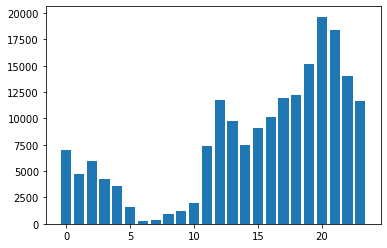

In [15]:
import matplotlib.pyplot as plt 

plt.bar(viewer_time_distribution.hour, viewer_time_distribution.counts)
plt.show()

9. The stream table and the chat table share a column: `device_id`.

   Join the two tables on that column.

In [16]:
merged_table = stream.join(chat.set_index('device_id'), on='device_id', rsuffix='_chat')
merged_table

,time,device_id,login,channel,country,player,game,stream_format,subscriber,genre,hour,time_chat,login_chat,channel_chat,country_chat,chat_device,game_chat
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,None,None,MOBA,18,2015-01-01 22:43:57,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0,Survival,23,2015-01-01 21:23:49,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,None,DayZ
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0,Survival,23,2015-01-01 22:00:41,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,None,DayZ
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0,Survival,23,2015-01-01 20:41:16,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,None,DayZ
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0,Survival,23,2015-01-01 20:46:02,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,None,DayZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526298,2015-01-01 20:16:36,413a9f43ea52fbad1355a7245a302b1b9c7a256b,f6746102aef80c4935ebfad803334e2e0d7dd3e9,george,US,iphone_t,DayZ,None,None,Survival,20,2015-01-01 22:46:49,f6746102aef80c4935ebfad803334e2e0d7dd3e9,george,US,iphone_t,DayZ
526298,2015-01-01 20:16:36,413a9f43ea52fbad1355a7245a302b1b9c7a256b,f6746102aef80c4935ebfad803334e2e0d7dd3e9,george,US,iphone_t,DayZ,None,None,Survival,20,2015-01-01 23:27:50,f6746102aef80c4935ebfad803334e2e0d7dd3e9,george,US,iphone_t,DayZ
526298,2015-01-01 20:16:36,413a9f43ea52fbad1355a7245a302b1b9c7a256b,f6746102aef80c4935ebfad803334e2e0d7dd3e9,george,US,iphone_t,DayZ,None,None,Survival,20,2015-01-01 23:11:49,f6746102aef80c4935ebfad803334e2e0d7dd3e9,george,US,iphone_t,DayZ
526298,2015-01-01 20:16:36,413a9f43ea52fbad1355a7245a302b1b9c7a256b,f6746102aef80c4935ebfad803334e2e0d7dd3e9,george,US,iphone_t,DayZ,None,None,Survival,20,2015-01-01 22:47:49,f6746102aef80c4935ebfad803334e2e0d7dd3e9,george,US,iphone_t,DayZ


10. Woohoo! You have completed the the guided practice, see what else you can dig up. For example:

    * What are your favorite games? Can you find some insights about its viewers and chat room users?
    * Is there anything you can do after joining the two tables?